In [1]:
import pandas as pd
import numpy as np
import json
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import dateutil.parser as parser
from datetime import datetime, date, timedelta
import torch
import skorch
import scipy
import torch.nn as nn
import torch
import torch.nn.functional as F
import sys
from skorch.helper import DataFrameTransformer
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_curve, auc, roc_auc_score
from sklearn.linear_model import SGDClassifier
from skorch import NeuralNetRegressor, NeuralNetBinaryClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import train_test_split  
from nltk.stem import WordNetLemmatizer

In [45]:
merged = pd.read_csv('merged.csv')
lemmatizer = WordNetLemmatizer()
all_tweets = merged["text"]
all_tweets = all_tweets.to_list()
print(all_tweets[0])
# for tweet in all_tweets:
#     # Remove all the special characters
#     processed_tweet = re.sub(r'\W', ' ', tweet)
 
#     # remove all single characters
#     processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)
 
#     # Remove single characters from the start
#     processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet) 
 
#     # Substituting multiple spaces with single space
#     processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)
 
#     # Removing prefixed 'b'
#     processed_tweet = re.sub(r'^b\s+', '', processed_tweet)
    
#     processed_tweet = re.sub(r'http\S+', '', processed_tweet)
#     #removing common pronouns and prepositions
#     processed_tweet = re.sub(r'of|to|https|keep|128', '', processed_tweet)
 
#     # Converting to Lowercase
#     processed_tweet = processed_tweet.lower()
    
#     tweet = processed_tweet
    
processed_tweets = []
X = all_tweets
for tweet in range(0, len(X)):  
    

    processed_tweet = re.sub(r"http\S+", "", str(X[tweet]))

    # Remove all the special characters
    processed_tweet = re.sub(r'\W', ' ', processed_tweet)
    
#     processed_tweet = re.sub(r'http\S+', '', processed_tweet)
    
    
#     processed_tweet = re.sub(r'co\S+', '', processed_tweet) 
    # remove all single characters
    processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)
 
    # Remove single characters from the start
    processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet) 
 
    # Substituting multiple spaces with single space
    processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)
 
    # Removing prefixed 'b'
    processed_tweet = re.sub(r'^b\s+', '', processed_tweet)
    

    
#     processed_tweet = re.sub(r'of|to|https|keep', '', processed_tweet)
    # Converting to Lowercase
    processed_tweet = processed_tweet.lower()
 
    processed_tweets.append(processed_tweet)

RT @Nicochan33: Apple Execs Chose to Keep a Hack of 128 Million iPhones Quiet https://t.co/waR9tgHKCA #tech #feedly #apple #iphone #cyberse…


In [46]:
print(all_tweets[0])
print(processed_tweets[0])

RT @Nicochan33: Apple Execs Chose to Keep a Hack of 128 Million iPhones Quiet https://t.co/waR9tgHKCA #tech #feedly #apple #iphone #cyberse…
rt nicochan33 apple execs chose to keep hack of 128 million iphones quiet tech feedly apple iphone cyberse 


In [47]:
tfidfv = TfidfVectorizer(TfidfVectorizer(input="array", norm="l2", max_features=None, sublinear_tf=True, stop_words="english",token_pattern=r'[^\s]+'))
df2 = tfidfv.fit_transform(processed_tweets)
# df2array = df2.toarray()

# https://programmerbackpack.com/tf-idf-explained-and-python-implementation/
dfnew = pd.DataFrame(df2[0].T.todense(), index=tfidfv.get_feature_names(), columns=["TF-IDF"])
dfnew = dfnew.sort_values('TF-IDF', ascending=False)
print (dfnew.head(30))

D:\Documents\anaconda3\envs\DataSciEnv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass input=TfidfVectorizer(input='array', stop_words='english', sublinear_tf=True,
                token_pattern='[^\\s]+') as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


                 TF-IDF
cyberse        0.375859
execs          0.350052
quiet          0.332968
chose          0.324682
feedly         0.289044
nicochan33     0.284799
128            0.266112
hack           0.264255
keep           0.229496
million        0.223453
iphones        0.218606
tech           0.147814
of             0.114637
iphone         0.097124
to             0.093568
apple          0.088161
rt             0.057141
thodex         0.000000
thomaskuhn     0.000000
thomaslast01   0.000000
thomann        0.000000
thoheller      0.000000
thoda          0.000000
thode          0.000000
thomaslknapp   0.000000
thomas_bildde  0.000000
tho            0.000000
thomasmoresoc  0.000000
thomasmuselet  0.000000
thnx           0.000000


4.04
-4.57
-0.12666603819921832
[-5.  -4.5 -4.  ...  3.5  4.   4.5]
[15 15 15 ... 12 12 12]
[ 1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[15745  6630 14905 41883 25827 29318 33841 46210 73033 46221 31477 37501
 14323 44459 15549 22017 18192]
[15745     0  6630 14905 41883 25827 29318 33841 46210 73033 46221 31477
 37501 14323 44459 15549 22017     0 18192]
1
19
20
17
19


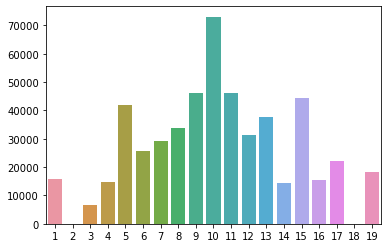

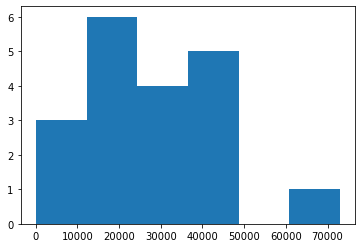

In [48]:
y = merged['Change']
date = merged['Date']
# plt.bar(x=date,height=y)

for x in y:
    if -4.5 <= x <= -4:
        print(hi)
    if 3.5 <= x <= 4:
        print(hi)
#     if -5 <= x <= -4.5:
#         print("between-5and-4.5")       
#     if 4 <= x <= 4.5:
#         print("between4and4.5")     
print(y.max())
print(y.min())
print(y.mean())
bins = np.arange(start=-5, stop=5, step = 0.5)
# bins = np.array([-1,1])
print(bins)
ybin = np.digitize(y, bins, right=True)
print(ybin)
uniq, counts = np.unique(ybin, return_counts=True)
np.set_printoptions(threshold=sys.maxsize)
print(uniq)
uniq = np.insert(uniq,1,2)
uniq = np.insert(uniq,17,18)
print(uniq)
print(counts)
counts = np.insert(counts,1,0)
counts = np.insert(counts,17,0)
print(counts)
np.set_printoptions(threshold = False)
# uniq.insert(1,2)
# uniq.insert(-2,18)
print(ybin.min())
print(ybin.max())
print(len(bins))
print(len(np.unique(ybin)))
print(len(counts))
sns.barplot(x=uniq,y=counts)
plt.show()
plt.hist(counts, bins='auto')
plt.show()

In [49]:
#Selecting the data and splitting into train and test
y = merged['Change']
print(type(y))
# X = df3
# X = df2
# X = df2array
X = processed_tweets
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(X, ybin, test_size=0.2, random_state=0)

# train_holdout_data.to_csv('train_holdout_data.csv', index=False)
# x_holdout.to_csv('x_holdout.csv', index=False)
# y_holdout.to_csv('y_holdout.csv', index=False)
# train_data.to_csv('train_data.csv', index=False)
# x_train.to_csv('x_train.csv', index=False)
# y_train.to_csv('y_train.csv', index=False)
# # x_test.to_csv('x_test.csv', index=False)
# y_test.to_csv('y_test.csv', index=False)

# # train_holdout_data = pd.read_csv('train_holdout_data.csv')
# # x_holdout = pd.read_csv('x_holdout.csv')
# # y_holdout = pd.read_csv('y_holdout.csv')
# # x_train = pd.read_csv('x_train.csv')
# y_train = pd.read_csv('y_train.csv')
# # x_test = pd.read_csv('x_test.csv')
# y_test = pd.read_csv('y_test.csv')

<class 'pandas.core.series.Series'>


In [46]:
pipe = Pipeline([("tfidf_vector_com", TfidfVectorizer(
               input="array",
               norm="l2",
               max_features=None,
               sublinear_tf=True,
               stop_words="english")),
          ("clf", SGDClassifier(
               loss="log",
               penalty="l2",
               class_weight="balanced",
               tol=0.001))])

pipe.fit(x_train, y_train)

pred_test = pipe.predict(x_test)
pred_train = pipe.predict(x_train)
print("test accuracy", str(np.mean(pred_test == y_test)))
print(metrics.classification_report(y_test, pred_test))

test accuracy 0.24352441818867412
              precision    recall  f1-score   support

           1       0.22      0.33      0.26      3164
           3       0.08      0.37      0.13      1339
           4       0.17      0.31      0.22      3000
           5       0.30      0.15      0.20      8315
           6       0.25      0.33      0.29      5130
           7       0.41      0.42      0.42      5965
           8       0.25      0.14      0.18      6684
           9       0.34      0.23      0.28      9299
          10       0.24      0.36      0.29     14536
          11       0.29      0.17      0.21      9225
          12       0.25      0.17      0.20      6254
          13       0.25      0.13      0.17      7409
          14       0.25      0.30      0.27      2849
          15       0.34      0.14      0.20      9095
          16       0.18      0.30      0.22      3089
          17       0.19      0.25      0.21      4407
          19       0.19      0.28      0.23    

In [6]:
rmse = mean_squared_error(y_test, pred_test, squared = False)
rmse

5.623315320271277

In [10]:
alist = [0.001,0.01,0.05,0.1,0.2,0.5,1,2,3,4.5]
# for a in alist:
#     print("Bin interval:", a)
#     bins = np.arange(start=-4.5, stop=(4.5+a), step = a)
# This process found no highly significant accuracy differences, but overall found 0.2 as optimal at this current stage

# bins = np.arange(start=-4.6, stop=(4.2), step = 0.2)
# y = merged['Change']
# # bins = np.array([-1,1])
# ybin = np.digitize(y, bins)
# X = processed_tweets
# x_train, x_test, y_train, y_test = train_test_split(X, ybin, test_size=0.2, random_state=0)


#FITTING THE CLASSIFICATION MODEL using Naive Bayes(tf-idf)
pipe = Pipeline([("tfidf_vector_com", TfidfVectorizer(
               input="array",
               norm="l2",
               max_features=None,
               sublinear_tf=True,
               stop_words="english")),
          ("clf", MultinomialNB())])


pipe.fit(x_train, y_train)  
#Predict y value for test dataset
y_predict = pipe.predict(x_test)
y_prob = pipe.predict_proba(x_train)[:,1]
print(classification_report(y_test,y_predict))
print()
# print('Confusion Matrix:',confusion_matrix(y_test, y_predict))

# fpr, tpr, thresholds = roc_curve(y_test, y_prob)
# roc_auc = auc(fpr, tpr)
# print('AUC:', roc_auc)

              precision    recall  f1-score   support

           1       0.84      0.11      0.19      3164
           3       0.80      0.04      0.08      1339
           4       0.73      0.06      0.11      3000
           5       0.54      0.22      0.31      8315
           6       0.59      0.24      0.35      5130
           7       0.69      0.33      0.45      5965
           8       0.68      0.14      0.23      6684
           9       0.56      0.30      0.39      9299
          10       0.19      0.91      0.31     14536
          11       0.46      0.29      0.36      9225
          12       0.62      0.14      0.23      6254
          13       0.62      0.19      0.29      7409
          14       0.76      0.15      0.26      2849
          15       0.46      0.26      0.33      9095
          16       0.77      0.07      0.13      3089
          17       0.78      0.11      0.20      4407
          19       0.77      0.13      0.23      3667

    accuracy              

In [25]:
# MODEL TESTING CELL
print(np.where(bins == 2)[0][0])
y_test1 = []
for x in y_test:
    for b in bins:
        if x == ((np.where(bins == b)[0][0])-1):
            y_test1.append(b-1)
print(y_test1[0:10])

14
[-1.5, 0.0, -0.5, -0.5, -3.5, 0.5, -2.5, -2.5, -0.5, -0.5]


In [33]:
profit = 0
for real, pred in zip(y_test1, y_predict):
    invest = 0
    if 15 >= pred > 11:
        invest = -2
    if pred > 15:
        invest = -1
    if 5 <= pred < 9:
        invest = 1
    if pred < 5:
        invest = 2
    change = (real * invest)
    profit += change
print(profit)
        

5224.5


In [15]:
y_train1 = y_train.astype(np.float32)
y_test1 = y_test.astype(np.float32)
# x_train1 = x_train.scipy.sparse.csr_matrix.astype(dtype = np.float32)
# x_test1 = x_test.scipy.sparse.csr_matrix.astype(dtype = np.float32)

AttributeError: 'list' object has no attribute 'scipy'

In [19]:
in_dimension = 413704
hid_dimension = 3
out_dimension = 1

class PoleNN(nn.Module):
    def __init__(self):
        super(PoleNN, self).__init__()
        self.fc1 = nn.Linear(in_dimension,hid_dimension)
        self.fc2 = nn.Linear(hid_dimension,out_dimension)
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self, X):
        hidden = self.fc1(X)
        hidden = self.sigmoid(hidden)
        output = self.fc2(hidden)
        return output

from skorch import NeuralNetRegressor
from sklearn.pipeline import Pipeline

pole_model = PoleNN()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(pole_model.parameters(), lr = 0.1)

net = NeuralNetBinaryClassifier(module=PoleNN, max_epochs=10, lr=0.1)

# pipe = Pipeline([('transform', DataFrameTransformer()),('net', net)])
# pipe = Pipeline([('net', net)])


pipe = Pipeline([("tfidf_vector_com", TfidfVectorizer(input="array", norm="l2", max_features=None, sublinear_tf=True, stop_words="english")), ("set_type", astype(dtype = np.float32)), ("net", net)])


pipe.fit(x_train, y_train1)  
#Predict y value for test dataset
y_predict = pipe.predict(x_test)
y_prob = pipe.predict_proba(x_train)[:,1]
print(classification_report(y_test1,y_predict))
# print('Confusion Matrix:',confusion_matrix(y_test, y_predict))
 
# fpr, tpr, thresholds = roc_curve(y_test, y_prob)
# roc_auc = auc(fpr, tpr)
# print('AUC:', roc_auc)

TypeError: astype() missing 1 required positional argument: 'x'

In [57]:
from sklearn.svm import LinearSVR, SVR

data = pd.DataFrame()
data['text'] = processed_tweets
data['bins'] = ybin.tolist()
data

,text,bins
0,rt nicochan33 apple execs chose to keep hack o...,15
1,rt roselovestyle house of the dragon the prequ...,15
2,rt gtorges ich habe jetzt einiges an material ...,15
3,rt itech911 future versions of apple carkey co...,15
4,発売日に予約してようやく届いた apple airtag ケースは純正じゃない 忘れん坊 実...,15
...,...,...
517126,rt mobitrade_ original apple airpods pro new a...,12
517127,ios apple swiftui swiftui 2 0 complex ui movi...,12
517128,sommige appels worden te snel slecht apple,12
517129,apple kia stockmarkets,12


In [58]:
data = data.sample(frac=0.1)
X1 = data['text']
ybin2 = np.array(data['bins'])
x_train, x_test, y_train, y_test = train_test_split(X1, ybin2, test_size=0.2, random_state=0)

In [59]:
x_trainsvm = x_train
y_trainsvm = y_train
x_testsvm = x_test

y_trainsvm = np.array(y_train).ravel()
y_testsvm = np.array(y_test).ravel()
#Create the SVM model

start = time.time()
# regressor = LinearSVR(random_state = 0)
regressor = SVR()
#Fit the model for the data
pipe = Pipeline([("tfidf_vector_com", TfidfVectorizer(input="array", norm="l2", max_features=None, sublinear_tf=True, stop_words="english")), ("regressor", regressor)])
pipe.fit(x_trainsvm, y_trainsvm)

#Make the prediction
y_predsvm = pipe.predict(x_testsvm)






accuracies = cross_val_score(estimator = regressor, X = x_trainsvm, y = y_trainsvm, cv = 10)
end = time.time()
# print("Fraction: ", x)
# print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
# print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
mse = mean_squared_error(y_test,y_predsvm)
print("Mean Squared Error: {}".format(mse))
r2 = r2_score(y_test,y_predsvm)
print("R-squared: {}".format(r2))
print("")
print("Elapsed Time: ", (end-start),"\n")

Mean Squared Error: 15.939267896743148
R-squared: 0.0708561214456278

Elapsed Time:  510.6967167854309 



D:\Documents\anaconda3\envs\DataSciEnv\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Documents\anaconda3\envs\DataSciEnv\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Documents\anaconda3\envs\DataSciEnv\lib\site-packages\sklearn\svm\_base.py", line 169, in fit
    X, y = self._validate_data(X, y, dtype=np.float64,
  File "D:\Documents\anaconda3\envs\DataSciEnv\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "D:\Documents\anaconda3\envs\DataSciEnv\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "D:\Documents\anaconda3\envs\DataSciEnv\lib\site-packages\sklearn\utils\validation.p